In [112]:
# Importing all necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from time import time
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor



from sklearn.preprocessing import StandardScaler, RobustScaler
scaler=StandardScaler()


import warnings
warnings.filterwarnings("ignore")

In [113]:
# Importing all provided data set 
df=pd.read_csv("ML case Study.csv")
colleges=pd.read_csv("Colleges.csv")
cities=pd.read_csv("cities.csv")

In [114]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


From this data we can clearly see that college names are not divided into their respective tires. To do so we have to categorize the college names in this data frame with the help of **college** data frame. <br>
Also in this data we have the city names not their types. To categorize the cities to their respective types we have to take help from **cities** dataframe.

In [115]:
colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [116]:
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [117]:
# Create a mapping dictionary for all tiers
college_tiers = {}

# Assign tier numbers manually
for college in colleges['Tier 1']:
    college_tiers[college] = "Tier  1"

for college in colleges['Tier 2']:
    college_tiers[college] = "Tier  2"

for college in colleges['Tier 3']:
    college_tiers[college] = "Tier  3"

# Map the College names in df to their corresponding tiers
df['College Tier'] = df['College'].map(college_tiers)

In the above step we mapped all the college names with their corresponding tier category.

In [118]:
# Create a dictionary to map city names to their category
city_category_map = {}

# Build the dictionary using for loop
for city in cities['Metrio City']:
    city_category_map[city] = 'Metrio City'

for city in cities['non-metro cities']:
    city_category_map[city] = 'non-metro cities'

# Use map to assign the city category to the df dataframe
df['City Category'] = df['City'].map(city_category_map)

In the above step we mapped all city names with their corresponding categories.

In [119]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Tier,City Category
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,Tier 2,non-metro cities
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,Tier 2,non-metro cities
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,Tier 3,non-metro cities
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,Tier 3,non-metro cities
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,Tier 1,non-metro cities


Scenes we mapped the college tier category and city category so we do not need to keep college names and city names as they will not play any vital role.

In [120]:
df.drop(["College", "City"], axis=1, inplace=True)

In [121]:
df.head()

,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Tier,City Category
0,Manager,55523.0,3,66,19,71406.58,Tier 2,non-metro cities
1,Executive,57081.0,1,84,18,68005.87,Tier 2,non-metro cities
2,Executive,60347.0,2,52,28,76764.02,Tier 3,non-metro cities
3,Executive,49010.0,2,81,33,82092.39,Tier 3,non-metro cities
4,Executive,57879.0,4,74,32,73878.10,Tier 1,non-metro cities


After categorized the college names to their respective tires and the city's names to their respective types we may drop the college names and city names column because those 2 columns have no use in future.

## Basic data exploration

In [122]:
df.head()

,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Tier,City Category
0,Manager,55523.0,3,66,19,71406.58,Tier 2,non-metro cities
1,Executive,57081.0,1,84,18,68005.87,Tier 2,non-metro cities
2,Executive,60347.0,2,52,28,76764.02,Tier 3,non-metro cities
3,Executive,49010.0,2,81,33,82092.39,Tier 3,non-metro cities
4,Executive,57879.0,4,74,32,73878.10,Tier 1,non-metro cities


In [123]:
print("Data has {} number of records and {} numbers of features.".format(df.shape[0], df.shape[1]))

Data has 1589 number of records and 8 numbers of features.


In [124]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Role                 1589 non-null   object 
 1   Previous CTC         1589 non-null   float64
 2   Previous job change  1589 non-null   int64  
 3   Graduation Marks     1589 non-null   int64  
 4   EXP (Month)          1589 non-null   int64  
 5   CTC                  1589 non-null   float64
 6   College Tier         1589 non-null   object 
 7   City Category        1589 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [126]:
df["Role"].unique()

array(['Manager', 'Executive'], dtype=object)

In a **Roll** column we have only manager and executive roles.

## Separating numerical and categorical features

In [127]:
column_int=[]
column_obj=[]
for col in df:
    dataTypeObj = df.dtypes[col]
    if dataTypeObj == np.int64 or dataTypeObj == np.float64 :
        column_int.append(col)
    if dataTypeObj== object:
        column_obj.append(col)

In [128]:
column_int

['Previous CTC',
 'Previous job change',
 'Graduation Marks',
 'EXP (Month)',
 'CTC']

In [129]:
column_obj

['Role', 'College Tier', 'City Category']

In the above step we separated numerical type columns and categorical type columns to Visualize the distribution of the numerical columns only with help of KDE plot

## Data cleaning

#### Missing value imputation

In [130]:
df.isnull().sum()

Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
College Tier           0
City Category          0
dtype: int64

From the above observation, we can see that there is no missing value in the data set.

#### Outliers detection and removal

We can visualize the outliers by using boxplot from Seaborn Library.

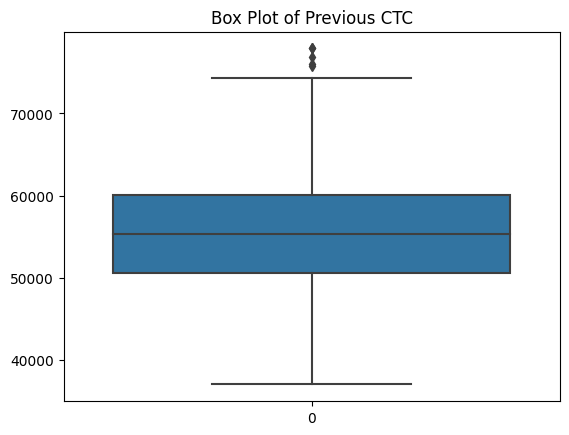

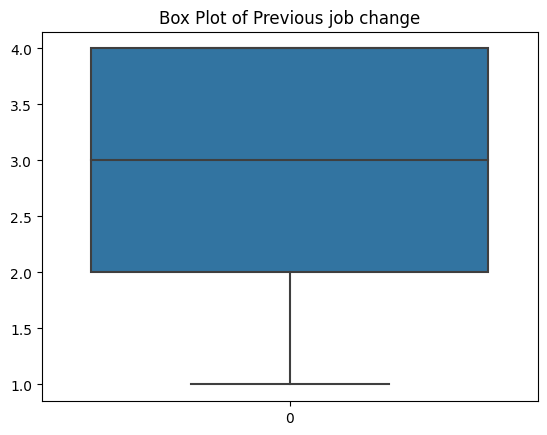

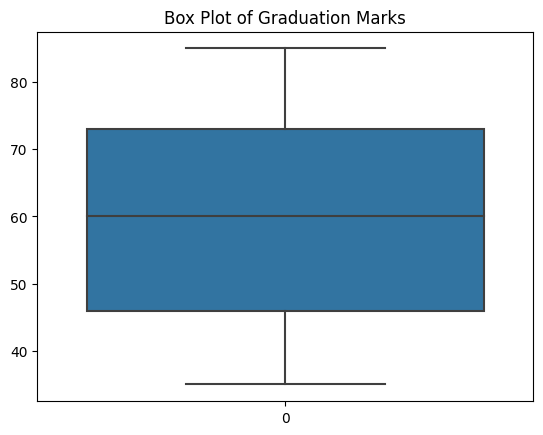

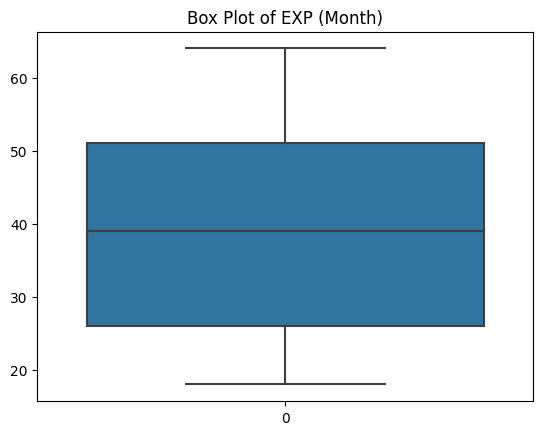

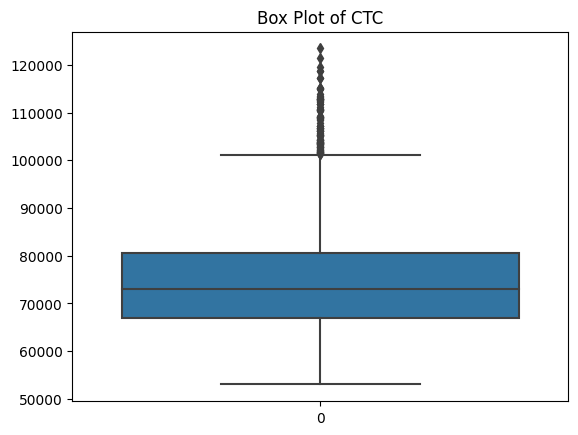

In [131]:
# Create a box plot for each column and save it as a separate figure

for column in df[column_int].columns:
    plt.figure()  # Create a new figure
    sns.boxplot(data=df[column])  # Create a box plot for the column
    plt.title(f'Box Plot of {column}')  # Title indicating the column name
    plt.show()  # Display the plot

From the above box plot we can see that in CTC column we have some outliers but since it's a dependent variable or a target variable so we cannot do anything to it. <br>
But in previous CTC column we can see very few outliers are present since it is not a dependent feature But still kind of the feature says that it is acceptable some outliers in this feature so we will keep it. 

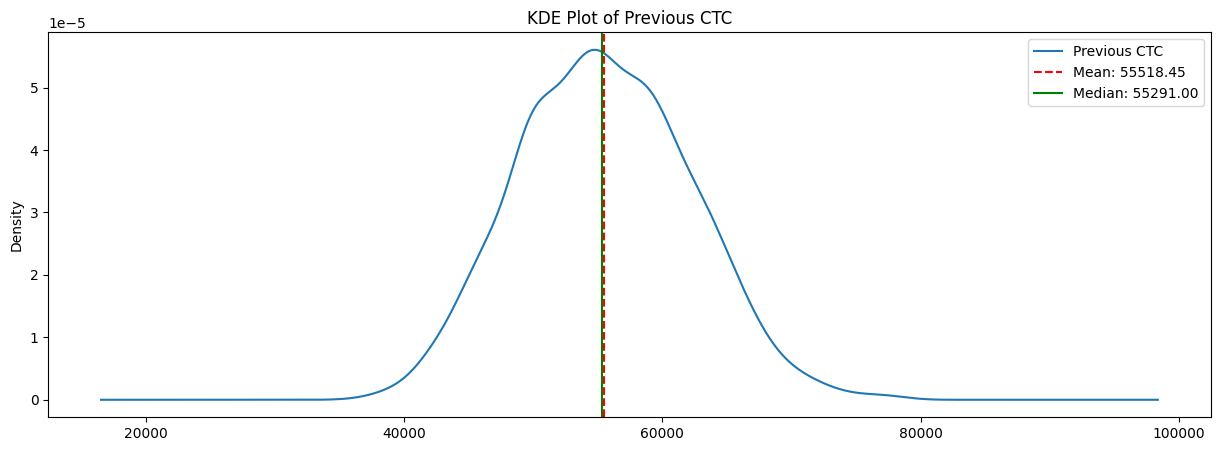

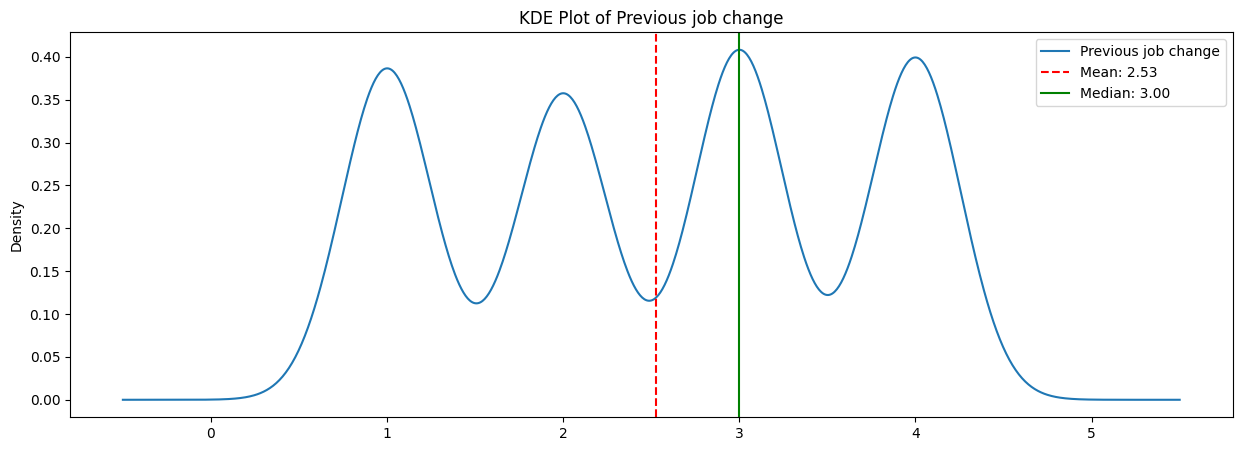

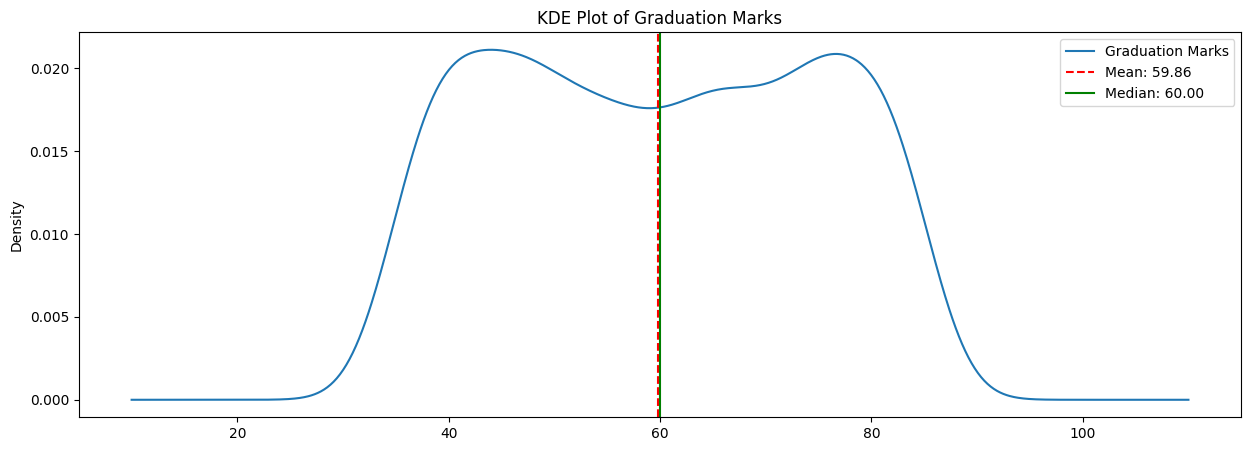

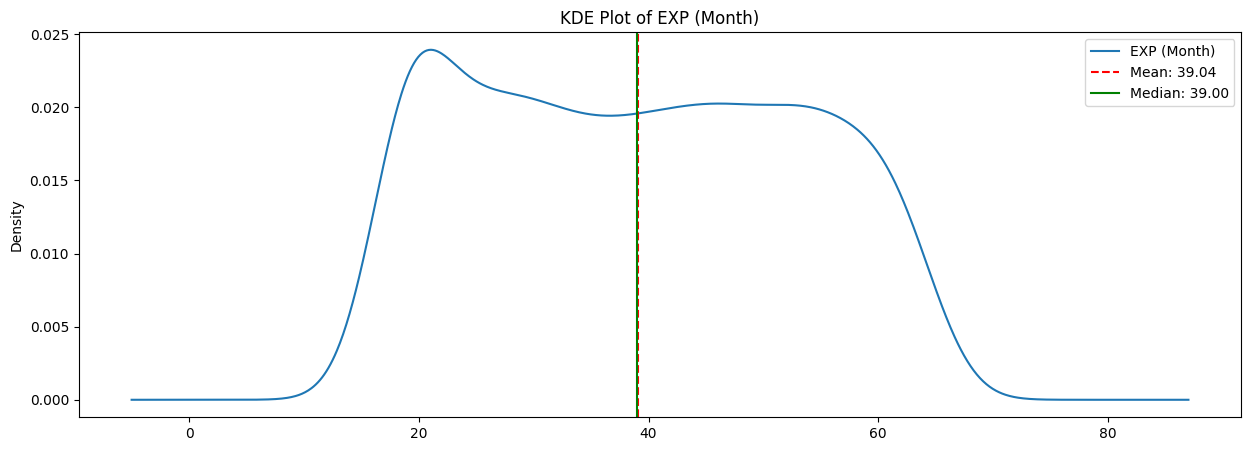

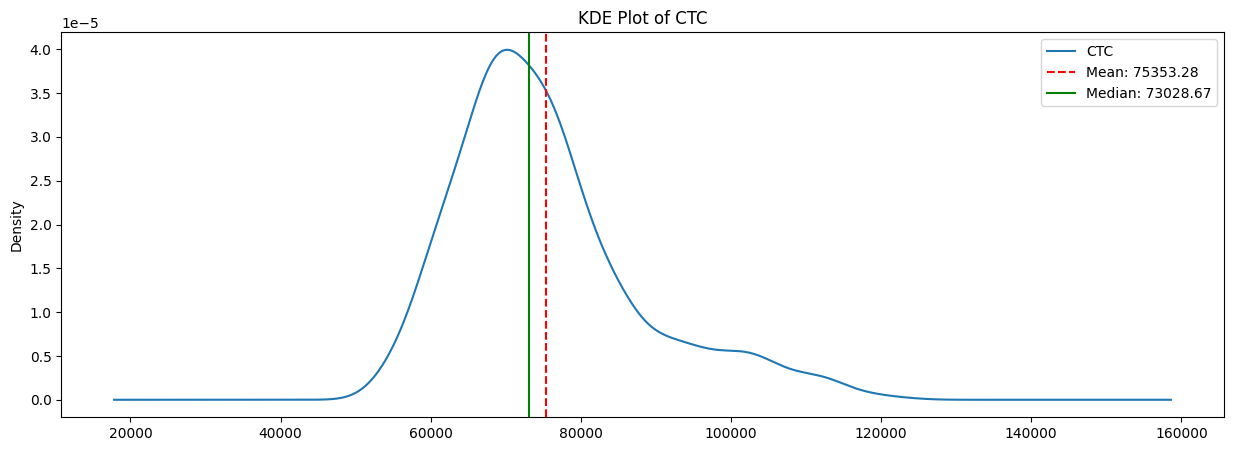

In [132]:
# Create a KDE plot for each column to check the distribution
DF=df[column_int]
for i in DF:
    plt.figure()  # Create a new figure
    DF[i].plot(kind='kde', figsize=(15,5)); # Plotting the KDE plot
    plt.title(f'KDE Plot of {i}')  # Title indicating the column name


    mean = np.mean(DF[i])
    median = np.median(DF[i])
    # Finding mean and median for current column
    plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')  # Red dashed line for mean
    plt.axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')  # Green solid line for median

    # Add a legend to explain the lines
    plt.legend()


    
    plt.show()  # Display the plot

From the above KDE Plot we can observe that previous CTC is normally distributed and it has mean and median almost the same so we can conclude that this feature is symmetric. Also our target variable which is CTC column is nearly normally distributed and has very less amount difference between mean and median so we can conclude that it is nearly normally distributed.

### Encoding categorical featured with dummy variables

In [133]:
df.head()

,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Tier,City Category
0,Manager,55523.0,3,66,19,71406.58,Tier 2,non-metro cities
1,Executive,57081.0,1,84,18,68005.87,Tier 2,non-metro cities
2,Executive,60347.0,2,52,28,76764.02,Tier 3,non-metro cities
3,Executive,49010.0,2,81,33,82092.39,Tier 3,non-metro cities
4,Executive,57879.0,4,74,32,73878.10,Tier 1,non-metro cities


In [134]:
# We're creating dummy variable with get_dummies function and dropping first column To avoid multicolinearity
df1=pd.get_dummies(df, drop_first=True, dtype=int)

In [135]:
df1.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager,College Tier_Tier 2,College Tier_Tier 3,City Category_non-metro cities
0,55523.0,3,66,19,71406.58,1,1,0,1
1,57081.0,1,84,18,68005.87,0,1,0,1
2,60347.0,2,52,28,76764.02,0,0,1,1
3,49010.0,2,81,33,82092.39,0,0,1,1
4,57879.0,4,74,32,73878.10,0,0,0,1


In this new data frame, <br>
**1.** Role manager=0 means Role = Manager and  1 means Role=Exeutive <br>
**2.** College Tier_Tier 2=0 AND College Tier_Tier 2=0 means College is categorized as "Tier 1" <br>
College Tier_Tier 2=1 AND College Tier_Tier 2=0 means College is categorized as "Tier 2" <br>
College Tier_Tier 2=0 AND College Tier_Tier 2=1 means College is categorized as "Tier 3" <br>
**3.** City Category_non-metro cities=1 means The city is categorized as "Non Metro City" <br>
City Category_non-metro cities=0 means The city is categorized as "Metro City" <br>

## Exploratory data analysis

In this section we will use the main dataframe i.e. **df** where all the categorical features are not converted to numerical values for ace of visualization.

In [136]:
df.head()

,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Tier,City Category
0,Manager,55523.0,3,66,19,71406.58,Tier 2,non-metro cities
1,Executive,57081.0,1,84,18,68005.87,Tier 2,non-metro cities
2,Executive,60347.0,2,52,28,76764.02,Tier 3,non-metro cities
3,Executive,49010.0,2,81,33,82092.39,Tier 3,non-metro cities
4,Executive,57879.0,4,74,32,73878.10,Tier 1,non-metro cities


#### Count of various roles

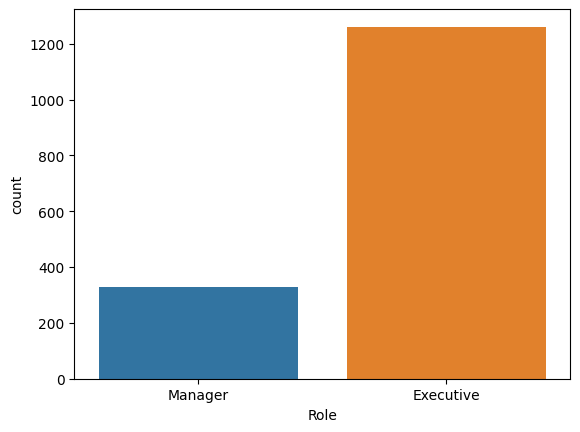

In [137]:
sns.countplot(data=df, x="Role");

In [138]:
df["Role"].value_counts()

Role
Executive    1261
Manager       328
Name: count, dtype: int64

From the above chart we can see that in the total number of record manager has only 328 count and executive has 1261 count.

#### Counts of various roles from different cities

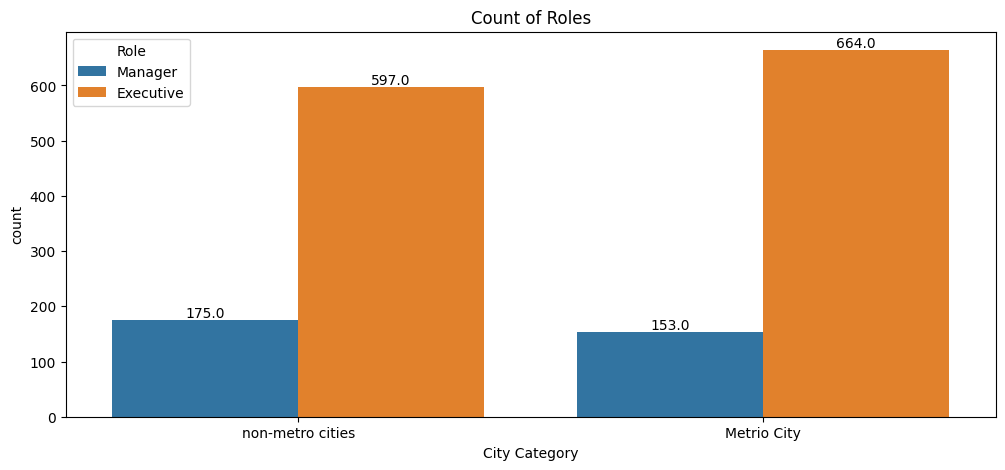

In [139]:
# Create the count plot with Seaborn
plt.figure(figsize = (12, 5))
plot = sns.countplot(data=df, x="City Category", hue="Role")

# Add the count text on each bar
for bar in plot.patches:
    count = bar.get_height()  # Get the count (height of the bar)
    plot.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        count,  # Y-coordinate (same as the height)
        str(count),  # Text to display (converted to string)
        ha='center',  # Center the text horizontally
        va='bottom'  # Position the text at the bottom of the annotation
    )

plt.title("Count of Roles")
plt.show()

From the above chart we can conclude that for both Metrocities and nonmetrosities count of manager post is low with compared to count of executive post.

#### Distribution of numerical variables with respect to target feature

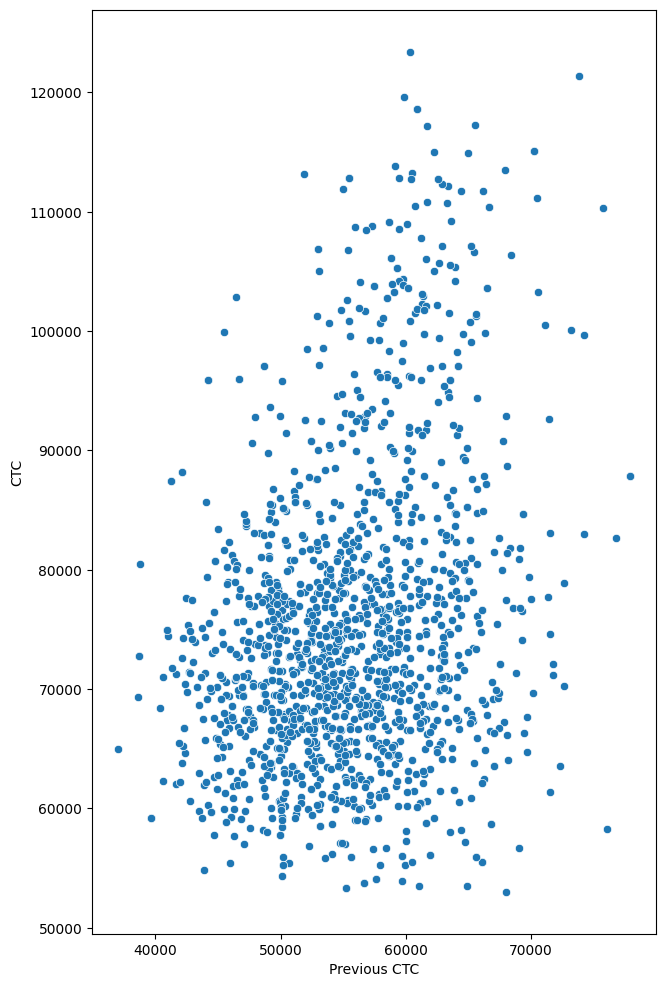

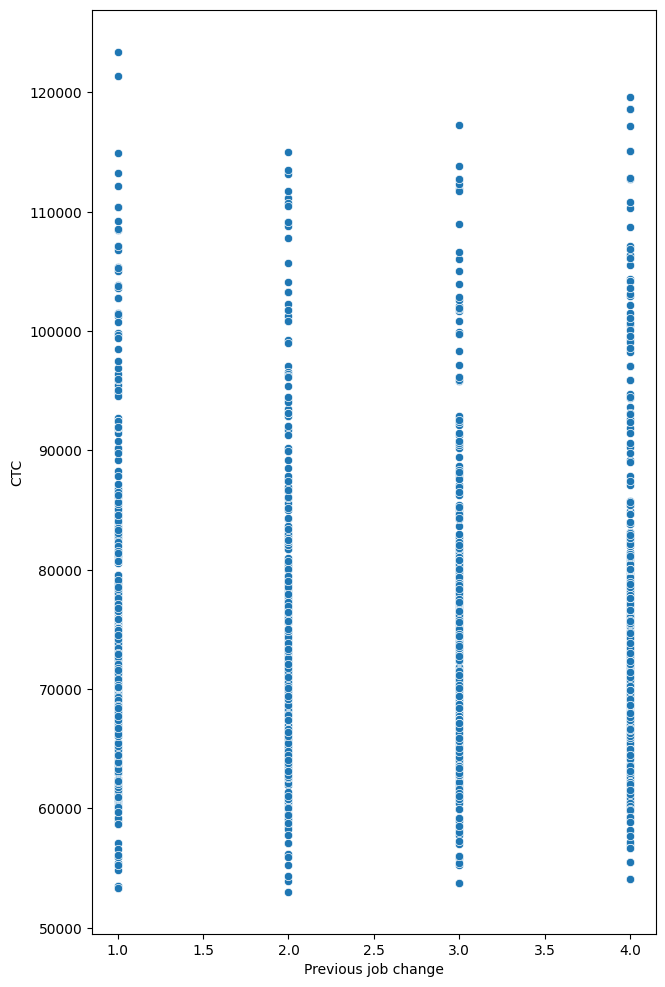

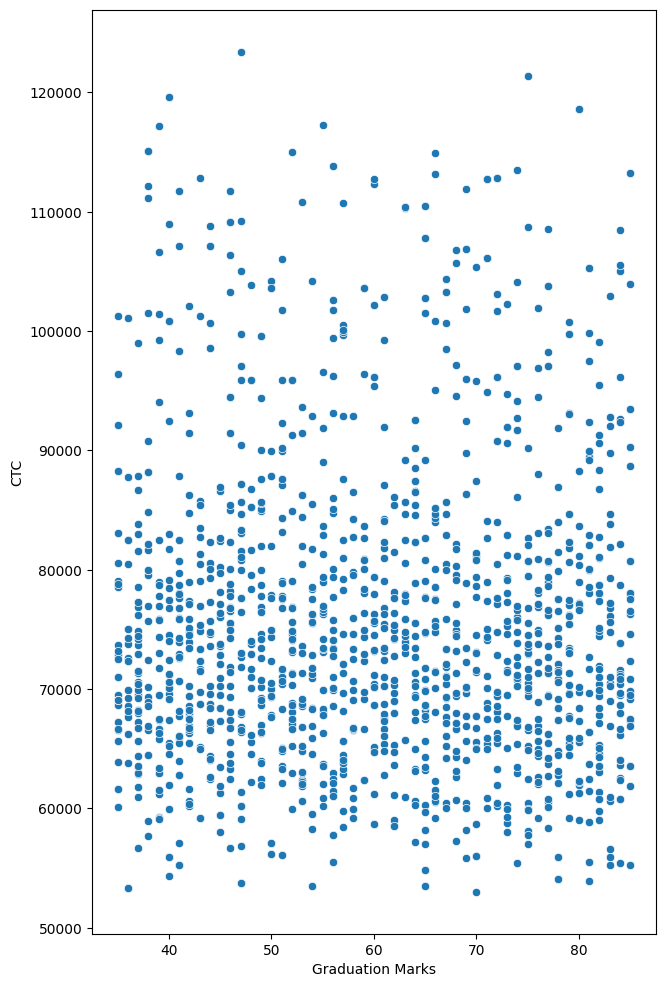

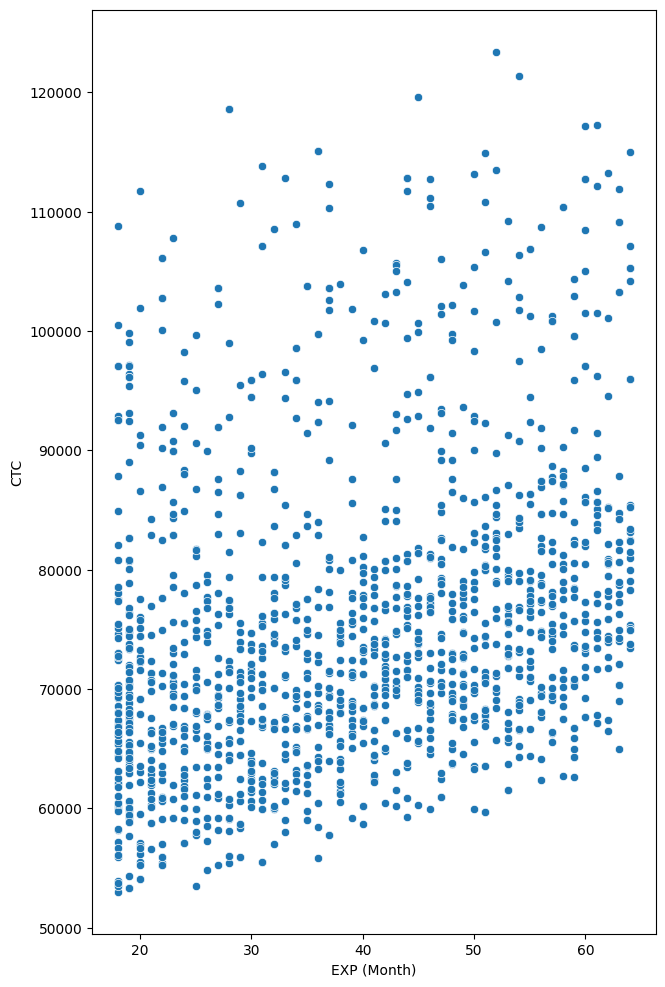

In [140]:
for i in column_int:
    if i!="CTC":
        plt.figure(figsize = (16, 12))
        ax = plt.subplot(1,2,2)
        sns.scatterplot(y="CTC", x=df[i], data=df, ax= ax);
    else:
        pass

From the above **CTC** vs **previous CTC** scatterplot it is clear that when candidate has previous CTC between 45,000 to 65,000 they are current CTC lies mostly between 60,000 to 85,000. So it is clear that in this company the candidates getting better salaries from their previous salary. <br> <br>
From the above **CTC** vs **EXP (Month)** scatterplot it is clear that when the Experience of the candidate rises they are minimum salary also increases. For example the candidate who has 20 months of experience are getting around 52,000 starting salary and for those people who has 50 months of experience they are getting almost 60,000 salary. But nothing is clear about their maximum salary. Because mostly higher salaries are defined by their skill set. Also we can say that most of employees salaries lies between 60,000 to 80,000.

#### Count of each roles from different college tiers

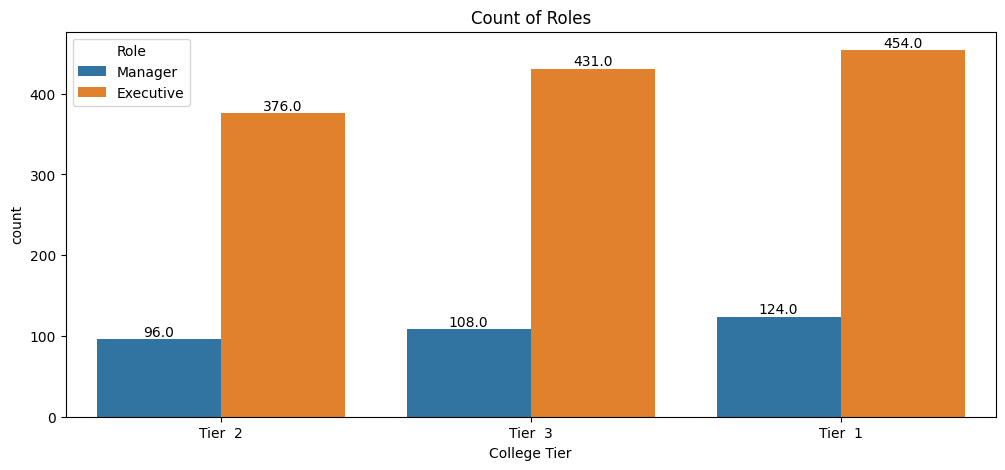

In [141]:



# Create the count plot with Seaborn
plt.figure(figsize = (12, 5))
plot = sns.countplot(data=df, x="College Tier", hue="Role")

# Add the count text on each bar
for bar in plot.patches:
    count = bar.get_height()  # Get the count (height of the bar)
    plot.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        count,  # Y-coordinate (same as the height)
        str(count),  # Text to display (converted to string)
        ha='center',  # Center the text horizontally
        va='bottom'  # Position the text at the bottom of the annotation
    )

plt.title("Count of Roles")
plt.show()

## Feature selection

#### Splitting the data into input and output feature

In [142]:
# Splitting the entire data into input and output where output is CTC and input is all other than CTC.
x=df1.drop(["CTC"], axis=1)
y=df1["CTC"]

#### Train test split

In [143]:
# To train model we have to split the data into train and test data set
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.70)
print("Shape of X train:",x_train.shape)
print("Shape of Y train:",y_train.shape)
print("Shape of X test:",x_test.shape)
print("Shape of Y test:",y_test.shape)

Shape of X train: (1112, 8)
Shape of Y train: (1112,)
Shape of X test: (477, 8)
Shape of Y test: (477,)


#### Preparing the regressors

In [144]:
# Initializing the algorithm object and creating a regression dictionary
LR=LinearRegression()
EN=ElasticNet()
SGDR=SGDRegressor()
BR=BayesianRidge()
DT=DecisionTreeRegressor()
RF=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ETR=ExtraTreesRegressor()
KNN=KNeighborsRegressor()

regressors = {
    'Linear Regression' : LR,
    'Elastic Net' : EN,
    'SGD Regressor' : SGDR,
    'Bayesian Ridge Regressor' : BR,
    'Decision Tree Regressor' : DT,
    'Random Forest Regressor' : RF,
    'Gradient Boost Regressor' : GBR,
    'ExtraTrees Regressor' : ETR,
    'K-nearest Neighbors Regressor' : KNN,
    }

In [145]:
# Generally tree based regressors are used to get the important features
treebased_regressors={
    'Decision Tree Regressor' : DT,
    'Random Forest Regressor' : RF,
    'Gradient Boost Regressor' : GBR,
    'ExtraTrees Regressor' : ETR,
    }

#### Correlation and heatmap

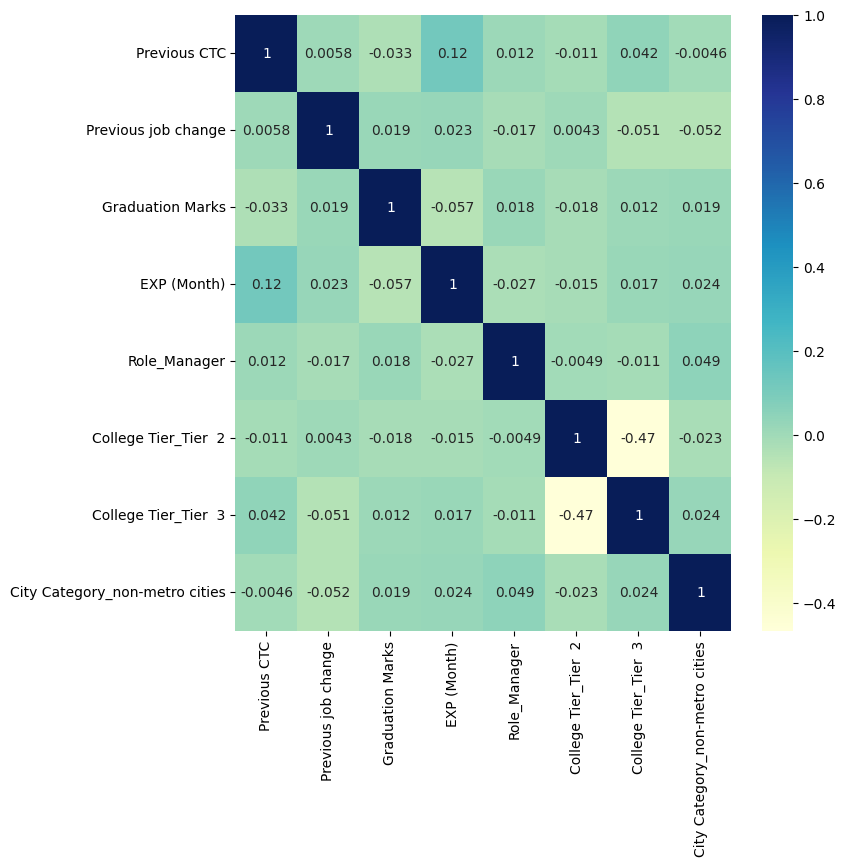

In [146]:
plt.figure(figsize = (8,8))
sns.heatmap(x.corr(), cmap="YlGnBu", annot=True)
plt.show()

From the correlation matrix and the heatmap, it is clear that no features are highly correlated with each other, so according this heatmap we do not need to drop any feature to avoid multicolinearity.

#### Feature importance using various algorithms

Plotting feature importances using Decision Tree Regressor


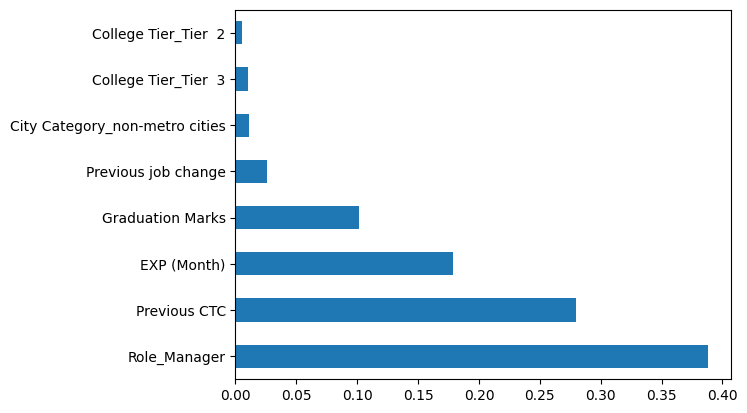



Plotting feature importances using Random Forest Regressor


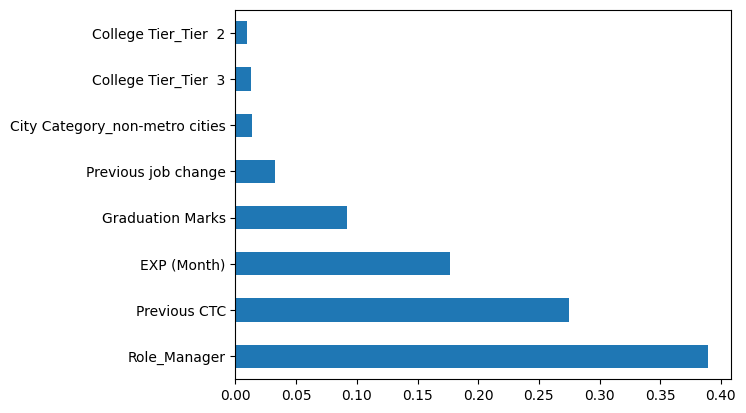



Plotting feature importances using Gradient Boost Regressor


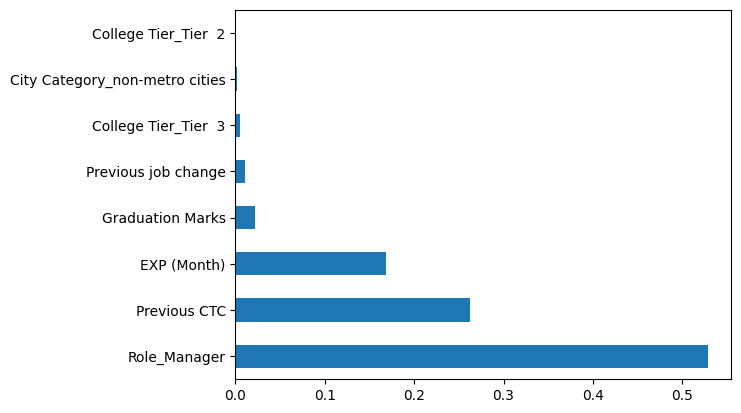



Plotting feature importances using ExtraTrees Regressor


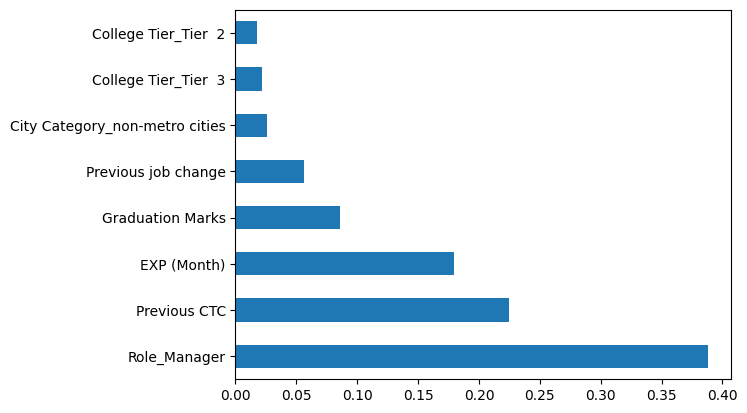

In [147]:
for method,func in treebased_regressors.items():
    func.fit(x_train, y_train)
    #plot graph of feature importances for better visualization
    print("Plotting feature importances using {}".format(method))
    feat_importances = pd.Series(func.feature_importances_, index=x_train.columns)
    feat_importances.nlargest(x_train.shape[1]).plot(kind='barh')
    plt.show()
    print("\n")
   

By using all tree based algorithm we have extract the feature importance. From all charts it is clear that, **college Tie_tier 3**, **college Tie_tier 2** have the least impact on output variable, But in extra tree regressor there is some effect on output variable so we can keep those two features.

#### Data normalization

In [148]:
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

#### Checking the distribution of target variable

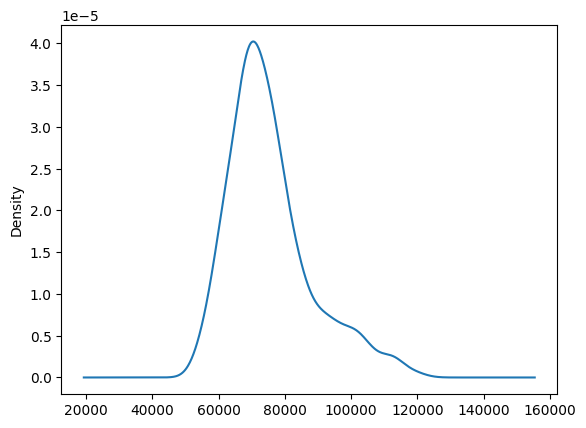

In [149]:
y_train.plot(kind= 'kde');

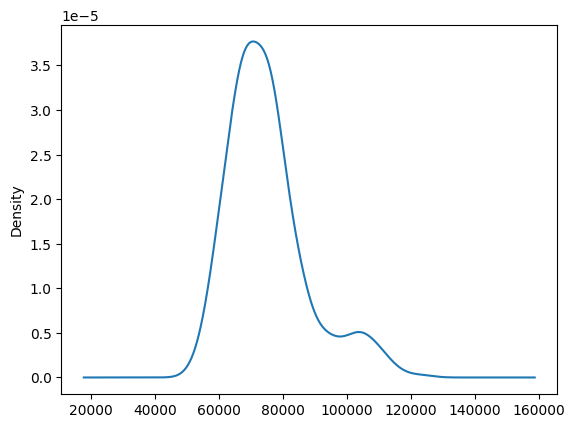

In [150]:
y_test.plot(kind= 'kde');

In [151]:
Y_train=y_train.copy()
Y_test=y_test.copy()

## Model training and model evolution

#### Model performance evolution function

In [154]:
def model_evaluate(y_test,y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('MAE is {}'.format(round(mae, 3)))
    print('MSE is {}'.format(round(mse, 3)))
    print('R2 score is {}'.format(round(r2, 3)))
    

### Linear regression

In [155]:
param_grid = {
    'fit_intercept': [True, False]  # Try both cases: with and without intercept
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(LR, param_grid, scoring='neg_mean_squared_error', cv=5)
# Fit the model with grid search on the training data
grid_search.fit(x_train_scaled, Y_train)
# Best hyperparameters
print("Best hyperparameters for Linear Regression:", grid_search.best_params_)
# Retrieve the best model
LR = grid_search.best_estimator_
# Make predictions on the test set
y_pred_lr = LR.predict(x_test_scaled)
model_evaluate(Y_test, y_pred_lr)
print("Train Accuracy:",LR.score(x_train_scaled, Y_train))
print("Test Accuracy:",LR.score(x_test_scaled, Y_test))

Best hyperparameters for Linear Regression: {'fit_intercept': True}
MAE is 6882.357
MSE is 75882915.322
R2 score is 0.511
Train Accuracy: 0.541977253914929
Test Accuracy: 0.5112061635999019


### Decision tree regressor

In [156]:
# Define a parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 4, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Features to consider when looking for the best split
}
# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(DT, param_grid, scoring='neg_mean_squared_error', cv=5)
# Fit the model with grid search on the training data
grid_search.fit(x_train_scaled, Y_train)
# Display the best hyperparameters for Decision Tree
print("Best hyperparameters for Decision Tree:", grid_search.best_params_)
# Retrieve the best model from the grid search
best_DT_model = grid_search.best_estimator_
# Make predictions on the test set with the best Decision Tree model
y_pred_dt = best_DT_model.predict(x_test_scaled)
model_evaluate(Y_test, y_pred_dt)
print("Train Accuracy:",best_DT_model.score(x_train_scaled, Y_train))
print("Test Accuracy:",best_DT_model.score(x_test_scaled, Y_test))

Best hyperparameters for Decision Tree: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
MAE is 6894.139
MSE is 79429892.853
R2 score is 0.488
Train Accuracy: 0.8027706625877757
Test Accuracy: 0.4883585865404202


### Random forest regressor

In [157]:
# Define a parameter grid for tuning hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 4, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # The number of features to consider for the best split
    'bootstrap': [True, False],  # Whether to use bootstrap sampling
}
# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(RF, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
# Fit the model with grid search on the training data
grid_search.fit(x_train_scaled, Y_train)
# Display the best hyperparameters for Random Forest
print("Best hyperparameters for Random Forest:", grid_search.best_params_)
# Retrieve the best model from the grid search
best_RF_model = grid_search.best_estimator_
# Make predictions on the test set with the best Random Forest model
y_pred_rf = best_RF_model.predict(x_test_scaled)

model_evaluate(Y_test, y_pred_rf)
print("Train Accuracy:",best_RF_model.score(x_train_scaled, Y_train))
print("Test Accuracy:",best_RF_model.score(x_test_scaled, Y_test))

Best hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MAE is 6139.55
MSE is 60790835.969
R2 score is 0.608
Train Accuracy: 0.883182110832386
Test Accuracy: 0.6084206068609117


### SGD regressor

In [158]:
# Define a parameter grid for tuning hyperparameters
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet'],  # Regularization type
    'alpha': [1e-4, 1e-3, 1e-2],  # Regularization strength
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Learning rate strategy
    'eta0': [0.01, 0.1, 1.0],  # Initial learning rate for 'constant' and 'invscaling'
    'max_iter': [1000, 2000],  # Maximum iterations
    'tol': [1e-3, 1e-4],  # Tolerance for early stopping
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(SGDR, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model with grid search on the training data
grid_search.fit(x_train_scaled, Y_train)

# Display the best hyperparameters for SGDRegressor
print("Best hyperparameters for SGDRegressor:", grid_search.best_params_)

# Retrieve the best model from the grid search
best_SGDR_model = grid_search.best_estimator_

# Make predictions on the test set with the best SGDRegressor model
y_pred_sgdr = best_SGDR_model.predict(x_test_scaled)

model_evaluate(Y_test, y_pred_sgdr)
print("Train Accuracy:",best_SGDR_model.score(x_train_scaled, Y_train))
print("Test Accuracy:",best_SGDR_model.score(x_test_scaled, Y_test))

Best hyperparameters for SGDRegressor: {'alpha': 0.01, 'eta0': 1.0, 'learning_rate': 'optimal', 'max_iter': 2000, 'penalty': 'elasticnet', 'tol': 0.001}
MAE is 6895.337
MSE is 75907282.072
R2 score is 0.511
Train Accuracy: 0.5398768879436111
Test Accuracy: 0.5110492070928394


### Bayesian Ridge Regressor

In [159]:
# Define a parameter grid for tuning hyperparameters
param_grid = {
    'alpha_1': [1e-6, 1e-5, 1e-4],  # Shape parameter for the Gamma distribution (weights)
    'alpha_2': [1e-6, 1e-5, 1e-4],  # Rate parameter for the Gamma distribution (weights)
    'lambda_1': [1e-6, 1e-5, 1e-4],  # Shape parameter for the Gamma distribution (noise)
    'lambda_2': [1e-6, 1e-5, 1e-4],  # Rate parameter for the Gamma distribution (noise)
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(BR, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model with grid search on the training data
grid_search.fit(x_train_scaled, Y_train)

# Display the best hyperparameters for Bayesian Ridge
print("Best hyperparameters for Bayesian Ridge:", grid_search.best_params_)

# Retrieve the best model from the grid search
best_BR_model = grid_search.best_estimator_

# Make predictions on the test set with the best Bayesian Ridge model
y_pred_br = best_BR_model.predict(x_test_scaled)


model_evaluate(Y_test, y_pred_br)
print("Train Accuracy:",best_BR_model.score(x_train_scaled, Y_train))
print("Test Accuracy:",best_BR_model.score(x_test_scaled, Y_test))

Best hyperparameters for Bayesian Ridge: {'alpha_1': 0.0001, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 0.0001}
MAE is 6882.892
MSE is 75854473.493
R2 score is 0.511
Train Accuracy: 0.5419568181608629
Test Accuracy: 0.5113893694038849


### Gradient boost regressor

In [160]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of individual trees
    'min_samples_split': [2, 4, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting each base learner
}

# Set up GridSearchCV with 5-fold cross-validation and use all CPU cores for computation
grid_search = GridSearchCV(GBR, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model with grid search on the training data
grid_search.fit(x_train_scaled, Y_train)

# Display the best hyperparameters for Gradient Boosting Regressor
print("Best hyperparameters for Gradient Boosting Regressor:", grid_search.best_params_)

# Retrieve the best model from the grid search
best_GBR_model = grid_search.best_estimator_

# Make predictions on the test set with the best Gradient Boosting model
y_pred_gbr = best_GBR_model.predict(x_test_scaled)


model_evaluate(Y_test, y_pred_gbr)
print("Train Accuracy:",best_GBR_model.score(x_train_scaled, Y_train))
print("Test Accuracy:",best_GBR_model.score(x_test_scaled, Y_test))

Best hyperparameters for Gradient Boosting Regressor: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}
MAE is 6263.5
MSE is 62794451.321
R2 score is 0.596
Train Accuracy: 0.8911490332944991
Test Accuracy: 0.5955144760121995


### Extra tree regressor

In [161]:
# Define a parameter grid for tuning hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the ensemble
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 4, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False],  # Whether to use bootstrap sampling
}

# Set up GridSearchCV with 5-fold cross-validation and use all CPU cores for computation
grid_search = GridSearchCV(ETR, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model with grid search on the training data
grid_search.fit(x_train_scaled, Y_train)

# Display the best hyperparameters for Extra Trees Regressor
print("Best hyperparameters for Extra Trees Regressor:", grid_search.best_params_)

# Retrieve the best model from the grid search
best_ETR_model = grid_search.best_estimator_

# Make predictions on the test set with the best Extra Trees model
y_pred_etr = best_ETR_model.predict(x_test_scaled)

model_evaluate(Y_test, y_pred_etr)
print("Train Accuracy:",best_ETR_model.score(x_train_scaled, Y_train))
print("Test Accuracy:",best_ETR_model.score(x_test_scaled, Y_test))

Best hyperparameters for Extra Trees Regressor: {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
MAE is 6402.517
MSE is 65060875.868
R2 score is 0.581
Train Accuracy: 0.8239142715922821
Test Accuracy: 0.5809154803793278


### KNN regressor

In [162]:
# Define a parameter grid for tuning hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting method
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm for nearest neighbor search
    'p': [1, 2],  # Power parameter for the Minkowski metric (1 for Manhattan, 2 for Euclidean)
}

# Set up GridSearchCV with 5-fold cross-validation and use all CPU cores for computation
grid_search = GridSearchCV(KNN, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model with grid search on the training data
grid_search.fit(x_train_scaled, Y_train)

# Display the best hyperparameters for KNN Regressor
print("Best hyperparameters for KNN Regressor:", grid_search.best_params_)

# Retrieve the best model from the grid search
best_KNN_model = grid_search.best_estimator_

# Make predictions on the test set with the best KNN model
y_pred_knn = best_KNN_model.predict(x_test_scaled)

model_evaluate(Y_test, y_pred_knn)
print("Train Accuracy:",best_KNN_model.score(x_train_scaled, Y_train))
print("Test Accuracy:",best_KNN_model.score(x_test_scaled, Y_test))

Best hyperparameters for KNN Regressor: {'algorithm': 'auto', 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
MAE is 6717.13
MSE is 72697260.442
R2 score is 0.532
Train Accuracy: 1.0
Test Accuracy: 0.5317263091891037


#### Creating a dictionary with trained model and their name to create a comparing data frame with individual metric of each model

In [163]:
trained_regressors = {
    'Linear Regression' : LR,
    'SGD Regressor' : best_SGDR_model,
    'Bayesian Ridge Regressor' : best_BR_model,
    'Decision Tree Regressor' : best_DT_model,
    'Random Forest Regressor' : best_RF_model,
    'Gradient Boost Regressor' : best_GBR_model,
    'ExtraTrees Regressor' : best_ETR_model,
    'K-nearest Neighbors Regressor' : best_KNN_model,
    }

In [168]:
def evaluate_regressors(X_TRAIN, X_TEST, Y_TRAIN, Y_TEST, trained_regressors):
    results = pd.DataFrame(columns=['Train Score', 'Test Score', 'Difference of Train-Test', 'MAE', 'MSE', 'R2-score'])

    for method, func in trained_regressors.items():
        pred = func.predict(X_TEST)
        results.loc[method] = [
            func.score(X_TRAIN, Y_TRAIN),
            func.score(X_TEST, Y_TEST),
            func.score(X_TRAIN, Y_TRAIN) - func.score(X_TEST, Y_TEST),
            np.round(mean_absolute_error(Y_TEST, pred), 3),
            np.round(mean_squared_error(Y_TEST, pred), 3),
            np.round(r2_score(Y_TEST, pred), 3)
        ]
    
    final_result = results.sort_values('Difference of Train-Test', ascending=True).style.background_gradient(cmap='Greens', subset=['Difference of Train-Test'])
    return final_result

    final_result = evaluate_regressors(X_TRAIN, X_TEST, Y_TRAIN, Y_TEST, trained_regressors)
    display(final_result)

In [169]:
evaluate_regressors(x_train_scaled, x_test_scaled, Y_train, Y_test, trained_regressors)

,Train Score,Test Score,Difference of Train-Test,MAE,MSE,R2-score
SGD Regressor,0.539877,0.511049,0.028828,6895.337000,75907282.072000,0.511000
Bayesian Ridge Regressor,0.541957,0.511389,0.030567,6882.892000,75854473.493000,0.511000
Linear Regression,0.541977,0.511206,0.030771,6882.357000,75882915.322000,0.511000
ExtraTrees Regressor,0.823914,0.580915,0.242999,6402.517000,65060875.868000,0.581000
Random Forest Regressor,0.883182,0.608421,0.274762,6139.550000,60790835.969000,0.608000
Gradient Boost Regressor,0.891149,0.595514,0.295635,6263.500000,62794451.321000,0.596000
Decision Tree Regressor,0.802771,0.488359,0.314412,6894.139000,79429892.853000,0.488000
K-nearest Neighbors Regressor,1.000000,0.531726,0.468274,6717.130000,72697260.442000,0.532000


# TASK 1 <br>
**My views about the problem statement**

This problem statement is about to developing a machine learning model to predict employee salaries based on the given factors. This needs practical understanding of the importance of fair compensation practices As well as the role of data-driven decision making in talent management. We had provided with diversed data such as experience, cities from which the employee belongs to,  the college tires from which the employee studied, previoust CTC etc. My job is to leveraging machine learning technology to offer a promising solution to streamline salary determination process and ensure competitive compensation packages as well. Overall this business problem statement reflects a real world application where data science or specifically machine learning technology can drive significant business impact in human resource and talent acquisition.

# TASK 2 <br>
**What will be my approach to solving the task?**

In this problem statement I will collect the necessary data and the necessary libraries. After collecting all the necessary things it is mandatory to understand the data by viewing some samples and it is highly mandatory to clean the data as required because all data is not cleaned by default due to some human error or any other reason. In data cleaning process I will take care of missing values, outliers and the normalization of data. To understand the data more precisely we should perform exploratory data analysis to visualize the data. After performing exploratory data analysis it is mandatory to convert all the categorical variables into numerical variables as machine learning algorithms does not compatible with any categorical variables for this reason I must convert the categorical variables into numerical variables. <br>
After processing all the data the next step is to apply various regression based machine learning algorithms such as linear regressor, decision tree regressor, random forest regressor, gradient boost regressor, KNN regressor etc. <br>
Applying street forward these algorithms is not sufficient in terms of performance of the model. To increase the performance of the model I performed hyperparameter tubing for each individual algorithms. After applying hyperparameter tuning I got the best predictive model. 

# TASK 3 <br>
**What were the available machine learning model options I have to perform in this task?**


The available machine learning algorithms are linear regression, decision tree regressor, random forest regressor, extratrees regressor, gradient boost regressor, SGD regressor, K-nearest neighbor regressor and Bayesian Ridge Regressor.

# TASK 4 <br>
**Which models performance is the best and what could be the possible reason for that?**

To compare the performance of every model I have created a dataframe with the algorithms name, their train score, test score, difference of train and test score, mean absolute error, mean square error and R2 score. <br>
From the created dataframe it is clear that, Out of every model **ExtraTrees Regressor** performing the best, because it has high R2 score (0.581000) as well as low difference in training and testing score (0.242999) which implies that, it is less prone to overfitting. Although few other models are also less prone to overfitting but those models are having very low R2 score which makes them less effective.

# TASK 5 <br>
**What steps can you take to improve this selected models performance even further?**

To improve the performance of the selected model we can Apply hyperparameter tuning with higher number of parameter combination which requires very high computational resources as well as time. This large number of hyperparameter combination can be tuned only by a industrial grade computer which has very large computational resource. This cannot be implemented in a customer grid computer where the computational resource is very limited.